In [24]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
ticker = 'AAPL'
freq = '1d'

In [26]:
df = pd.read_csv(f'data/{ticker}/{freq}_features.csv')
df.columns = df.columns.str.lower()
df.head()

,open,high,low,close,volume,datetime,width,sma,ema,rsi,roc,diff,perc_diff
0,5.86301,5.96680,5.82384,5.92842,8.771742e+08,2010-02-01 00:00:00,0.796227,6.303707,6.140772,38.187350,-0.073205,0.08175,1.398232
1,5.96451,5.97677,5.88704,5.96201,8.186530e+08,2010-02-02 00:00:00,0.825675,6.276047,6.108270,40.684413,-0.057242,0.03359,0.566593
2,5.94437,6.09511,5.91874,6.06500,7.205451e+08,2010-02-03 00:00:00,0.810868,6.252977,6.100402,41.122589,-0.054197,0.10299,1.727438
3,5.99312,6.03958,5.83250,5.84647,8.869241e+08,2010-02-04 00:00:00,0.870970,6.224190,6.054233,37.635942,-0.082957,-0.21853,-3.603133
4,5.86581,5.96680,5.81028,5.95035,9.965172e+08,2010-02-05 00:00:00,0.885137,6.201165,6.035345,42.548420,-0.050781,0.10388,1.776799


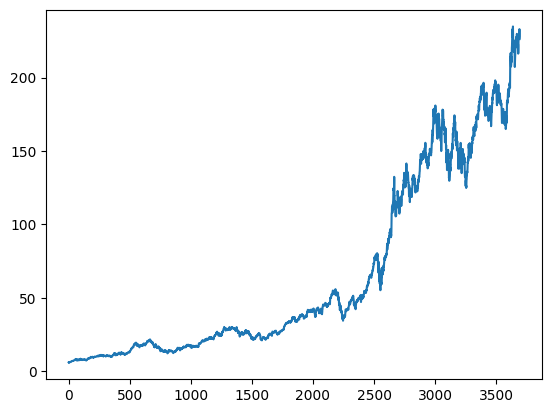

In [23]:
plt.plot(df['close'])

In [4]:
scale_type = 'minmax'
if scale_type == 'standard':
    scaler = StandardScaler()
elif scale_type == 'minmax':
    scaler = MinMaxScaler()

In [27]:
train = df[:int(0.6*len(df))]
val = df[int(0.6*len(df)):int(0.8*len(df))]
test = df[int(0.8*len(df)):]

In [6]:
df.drop(['open', 'high', 'low', 'diff'], axis=1, inplace=True)
df['close'] = np.log(df['close'])
df['sma'] = np.log(df['sma'])
df['ema'] = np.log(df['ema'])

In [7]:
df_scaled = scaler.fit_transform(df.drop(columns=['datetime']))
train_scaled = df_scaled[:int(0.6*len(df))]
val_scaled = df_scaled[int(0.6*len(df)):int(0.8*len(df))]
test_scaled = df_scaled[int(0.8*len(df)):]

In [8]:
df.describe().to_csv(f'data/{ticker}/{freq}_info.csv')

In [10]:
train_scaled = pd.DataFrame(train_scaled,
                            columns=['close', 'volume', 'width', 'sma', 'ema', 'rsi', 'roc', 'perc_diff'])
val_scaled = pd.DataFrame(val_scaled,
                          columns=['close', 'volume', 'width', 'sma', 'ema', 'rsi', 'roc', 'perc_diff'])
test_scaled = pd.DataFrame(test_scaled,
                           columns=['close', 'volume', 'width', 'sma', 'ema', 'rsi', 'roc', 'perc_diff'])

In [11]:
train_scaled['datetime'] = train['datetime'].values
val_scaled['datetime'] = val['datetime'].values
test_scaled['datetime'] = test['datetime'].values

In [12]:
len(train_scaled), len(val_scaled), len(test_scaled)

(2215, 738, 739)

In [13]:
train_scaled.to_csv(f'data/{ticker}/{freq}_{scale_type}_train.csv', index=False)
val_scaled.to_csv(f'data/{ticker}/{freq}_{scale_type}_val.csv', index=False)
test_scaled.to_csv(f'data/{ticker}/{freq}_{scale_type}_test.csv', index=False)